In [41]:
import csv
import datetime
import time
import os
from selenium import webdriver

import matplotlib.pyplot as plt
import collections
from openpyxl import load_workbook

import math
import statistics
import numpy as np

In [42]:
ytrs_view = []
ytrs_emotion = []

In [85]:
def get_filename_from_folder(folder_path, ext=""):
    file_name_list = []
    for file_name in os.listdir(folder_path):
        name = os.path.join(folder_path + "/"+ file_name)
        
        # get file extension
        file_ext = os.path.splitext(file_name)[1]
        # if user give ext and the file extension is not the same, pass
        if ext and file_ext != ext:
            continue
        
        # os.rename(name, os.path.join(folder_path + "/"+ file_name[1:]))
#         
        file_name_list.append(name)
        
    return sorted(file_name_list)

def filename_process(target, filename_list):
    
    split_file_name = [ x.split("_") for x in filename_list]
    
    for i in split_file_name:
        try:
            ytr = i[1][1:]
            types = i[3]
            start = i[4]
            end = i[5].split(".")[0]
        
            if target == ytr:
                yield ytr, types, start, end
        except:
            pass

def get_file_by_ytr_and_date(ytr, types, start, filename_list):
    file_list = []
    for fytr, ftypes, fstart, fend in filename_process(ytr, filename_list):
        if fytr == ytr and ftypes == types and fstart == start:
            name = f"./yt_/{fytr}_單主題_{ftypes}_{fstart}_{fend}.xlsx"
            file_list.append(name)
    return file_list

In [89]:
filename_list_op = get_filename_from_folder("./yt_")
ytr_list = list(set())
filename_list_op[0]

'./yt_/Dr.Ivan_單主題_來源_20191201_20201231.xlsx'

In [90]:

for filename in get_file_by_ytr_and_date("HowFun", '趨勢', "20201201", filename_list_op):
    print(filename)


./yt_/HowFun_單主題_趨勢_20201201_20211222.xlsx


In [156]:
import openpyxl
openpyxl.Workbook.encoding="cp936"
ytrs_view = []
ytrs_emotion = []

ytrs = ["Joeman", "Toyz"]
# opview 資料（聲量）
DATE = "20201201"
for ytr in ytrs:
    for filename in get_file_by_ytr_and_date(ytr, '趨勢', DATE, filename_list_op):
        wb = load_workbook(filename=filename)
        op_view_data = collections.OrderedDict()
        # op_view_data['name'] = ytr
        opview_wb = wb['日趨勢']
        for i in range(2, opview_wb.max_row+1):
            day = opview_wb.cell(column=1, row=i).value
            qty = opview_wb.cell(column=2, row=i).value
            
            if day >= "2021/04/19" and day <= "2021/05/08":
                op_view_data[day] = qty

        ytrs_view.append(op_view_data)
    
    for filename in get_file_by_ytr_and_date(ytr, '情緒', DATE, filename_list_op):
        # opview 資料（情緒）
        wb = load_workbook(filename=filename)
        op_view_emotion = collections.OrderedDict(
            {'good': collections.OrderedDict(), 'bad': collections.OrderedDict()})
        # op_view_emotion['name'] = ytr
        opview_wb = wb['日情緒趨勢']
        for i in range(2, opview_wb.max_row+1):

            day = opview_wb.cell(column=1, row=i).value
            good = opview_wb.cell(column=2, row=i).value
            bad = opview_wb.cell(column=3, row=i).value
            total = opview_wb.cell(column=4, row=i).value

            if day >= "2021/04/19" and day <= "2021/05/08":
                op_view_emotion["good"][day] = good
                op_view_emotion["bad"][day] = bad

        ytrs_emotion.append(op_view_emotion)


Joeman


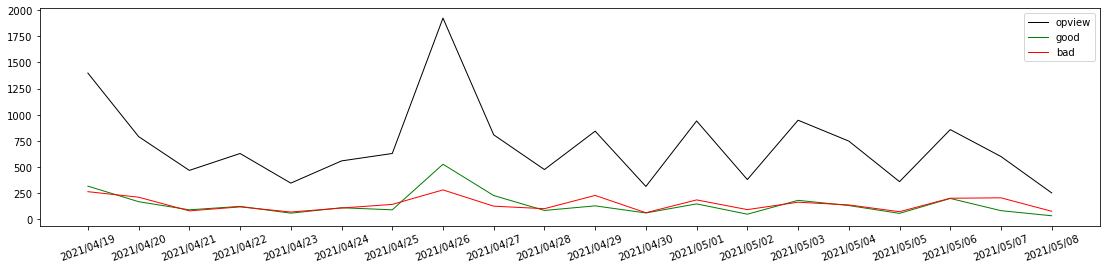

Toyz


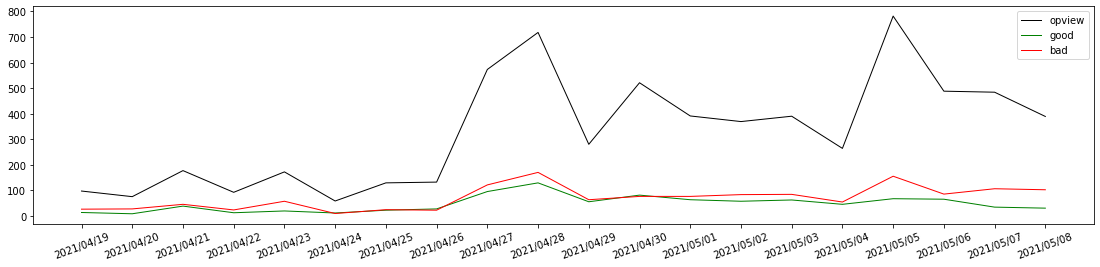

In [157]:
for view, emotion, name in zip(ytrs_view, ytrs_emotion, ytrs):
    print(name)
    fig, ax1 = plt.subplots(figsize=(19,4))
    ax1.plot(view.values(),figure=fig, linewidth=1, c='black', label="opview")
    ax1.plot(emotion["good"].values(), figure=fig, linewidth=1, c='g', label="good")
    ax1.plot(emotion["bad"].values(), figure=fig, linewidth=1, c='r', label="bad")
    plt.xticks(range(0, len(list(view.values()))), list(view.keys()),
               rotation=20)
    ax1.legend()
    plt.show()


In [158]:
filename_list_news_et = []
for ytr in ytrs:
    print(ytr)
    filename_list_news = get_filename_from_folder(
        "/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/" + ytr)
    for x in filename_list_news:
        if x.split('/')[-1] == "ettoday_keywords.csv":
            filename_list_news_et.append(x)
filename_list_news_et

Joeman
Toyz


['/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/Joeman/ettoday_keywords.csv',
 '/Users/bobo/OneDrive - 台灣微軟/0. bobo/Codes/crawlers/data/Toyz/ettoday_keywords.csv']

In [161]:
news_list = []
for filename in filename_list_news_et:
    news = []
    with open(filename, encoding="utf-8") as f:
        reader = csv.reader(f)
        for row in reader:
            # Source,Title,Link,Date,Summary,Text,Like

            if row == ['Source', 'Title', 'Link', 'Date', 'Summary', 'Text', 'Like']:
                continue

            Title = "".join(row[1].split())
            Link = row[2]
            Date = row[4].split(" ")[0].replace('-', '/')
            Summary = "".join(row[5].split())

            news.append({"title": Title, "link": Link,
                            "date": Date, "summary": Summary})
    news_list.append(news)


In [160]:
MULTIPLY = 3
print('單日大於', MULTIPLY, '倍過去七天的平均：')

# event definition

    # event definition
    data = [list(op_view_data.values())[0]] * 7
    data.extend(list(op_view_data.values()))

    count = 0
    event_list = []

    for i, d in enumerate(data[7:], start=7):
        seven_day = data[i-7:i]
        seven_day_avg = sum(seven_day)/7
        if d > MULTIPLY * seven_day_avg and i > 0 and i < 91:
            day = list(op_view_data.keys())[i]
            event_list.append(day)


    # find news
    print('事件日期      日期好壞比  新聞日期     新聞日期好壞比    新聞標題')
    for i in news:
        day_add = datetime.timedelta(days=5)
        news_date = string_to_datetime(i['date'])
        for event in event_list:
            event_day = string_to_datetime(event)
            if news_date >= event_day and news_date <= event_day + day_add:

                print(event_day.strftime('%Y-%m-%d'), ' ',
                    '%.2f' % (round(
                        op_view_emotion['good'][event] / op_view_emotion['bad'][event], 2)), '    ',
                    news_date.strftime('%Y-%m-%d'), '  '
                    '%.2f' % (round(
                        op_view_emotion['good'][i['date']] / op_view_emotion['bad'][i['date']], 2)), '       ',
                    i['title'])
                break


IndentationError: unexpected indent (<ipython-input-160-8fe5ce8438ab>, line 8)